In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import itertools
import statsmodels.api as sm



In [33]:
df = pd.read_excel("sample_data_2final.xlsx")
df
df['Date'] = pd.to_datetime(df.Date)
df.isnull().sum()



Week              0
Leads             0
Wins              0
L_W_Expression    0
Year              0
Date              0
dtype: int64

In [31]:
df = df.groupby('Date')['Leads'].sum().reset_index()
print(df)
df.index

          Date  Leads
0   2017-01-02   2399
1   2017-01-09   4474
2   2017-01-16   3117
3   2017-01-23   5150
4   2017-01-30   3720
5   2017-02-06   3913
6   2017-02-13   4053
7   2017-02-20   3951
8   2017-02-27   4951
9   2017-03-06   6928
10  2017-03-13   4331
11  2017-03-20   5186
12  2017-03-27   5556
13  2017-04-03   3878
14  2017-04-10   3305
15  2017-04-17   3539
16  2017-04-24   5402
17  2017-05-01   3971
18  2017-05-08   4774
19  2017-05-15   8224
20  2017-05-22   4996
21  2017-05-29   3894
22  2017-06-05   5081
23  2017-06-12   4649
24  2017-06-19   5021
25  2017-06-26   4917
26  2017-07-03   2650
27  2017-07-10   3519
28  2017-07-17   4765
29  2017-07-24   5519
..         ...    ...
75  2018-06-11   4309
76  2018-06-18   6782
77  2018-06-25   5224
78  2018-07-02   2410
79  2018-07-09   3640
80  2018-07-16   3813
81  2018-07-23   3819
82  2018-07-30   3523
83  2018-08-06   4743
84  2018-08-13   3350
85  2018-08-20   2928
86  2018-08-27   3830
87  2018-09-03   3289
88  2018-0

RangeIndex(start=0, stop=105, step=1)

In [4]:
sales=df.set_index('Date')
sales.index

DatetimeIndex(['2017-01-02', '2017-01-09', '2017-01-16', '2017-01-23',
               '2017-01-30', '2017-02-06', '2017-02-13', '2017-02-20',
               '2017-02-27', '2017-03-06',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=105, freq=None)

In [5]:
y = sales['Leads'].resample('MS').mean()
print(y)

Date
2017-01-01    3772.00
2017-02-01    4217.00
2017-03-01    5500.25
2017-04-01    4031.00
2017-05-01    5171.80
2017-06-01    4917.00
2017-07-01    4095.00
2017-08-01    4667.50
2017-09-01    4772.25
2017-10-01    4270.40
2017-11-01    4208.50
2017-12-01    5201.25
2018-01-01    3383.20
2018-02-01    5086.75
2018-03-01    4743.00
2018-04-01    3218.60
2018-05-01    3559.00
2018-06-01    5389.75
2018-07-01    3441.00
2018-08-01    3712.75
2018-09-01    4034.00
2018-10-01    3039.40
2018-11-01    2948.75
2018-12-01    3605.80
Freq: MS, Name: Leads, dtype: float64


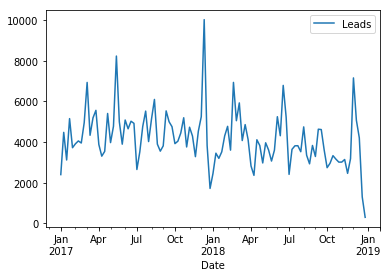

In [6]:
sales.plot()
plt.show()

In [7]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8

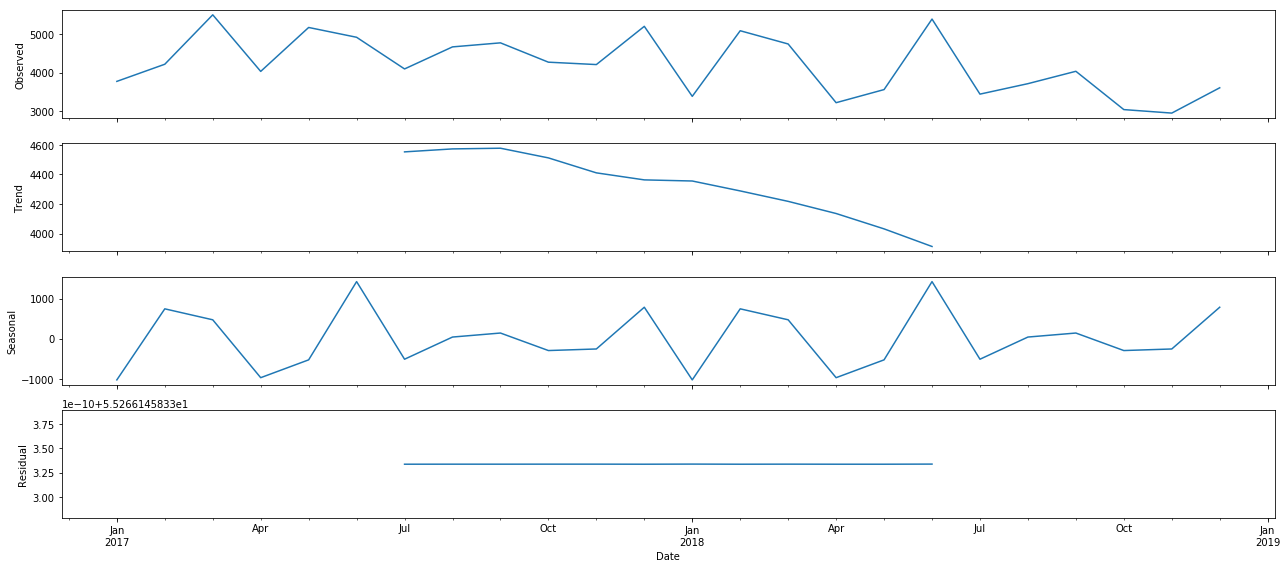

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
print(y)

Date
2017-01-01    3772.00
2017-02-01    4217.00
2017-03-01    5500.25
2017-04-01    4031.00
2017-05-01    5171.80
2017-06-01    4917.00
2017-07-01    4095.00
2017-08-01    4667.50
2017-09-01    4772.25
2017-10-01    4270.40
2017-11-01    4208.50
2017-12-01    5201.25
2018-01-01    3383.20
2018-02-01    5086.75
2018-03-01    4743.00
2018-04-01    3218.60
2018-05-01    3559.00
2018-06-01    5389.75
2018-07-01    3441.00
2018-08-01    3712.75
2018-09-01    4034.00
2018-10-01    3039.40
2018-11-01    2948.75
2018-12-01    3605.80
Freq: MS, Name: Leads, dtype: float64


In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:452.0708109732514
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:186.4586255528371
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:195.41798693406386
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:419.81665765334367
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:170.3369070308847
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:197.32607797047407
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:371.1416035317313
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:167.91935269458216
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:186.520967584841
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:340.8684649845533
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:148.84729971052232
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:183.5750563023364
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:388.702921116576
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:185.14072529637593
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:182.27007506606554
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:356.95378156945503
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:169.49898150690098
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:179.59295504696445
AR

In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4570      0.215     -2.123      0.034      -0.879      -0.035
sigma2      5.546e+05   3.39e+05      1.636      0.102    -1.1e+05    1.22e+06


In [13]:
results.plot_diagnostics

<bound method MLEResults.plot_diagnostics of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x1c16250978>>

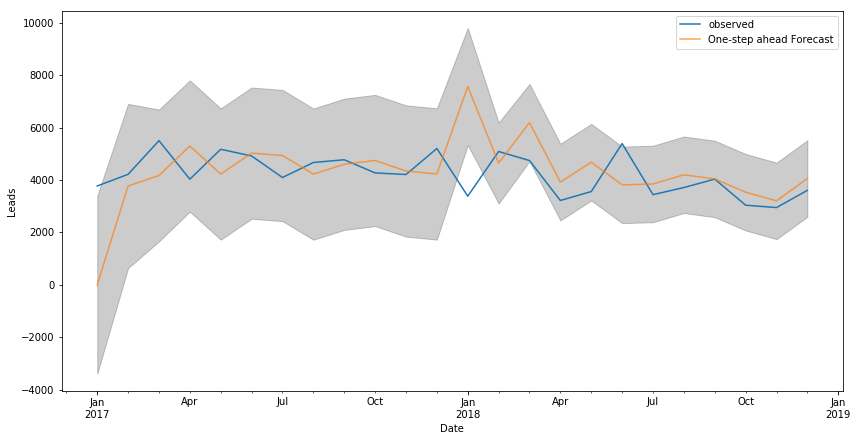

In [14]:
pred = results.get_prediction(start='2017-01-01', dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Leads')
plt.legend()
plt.show()

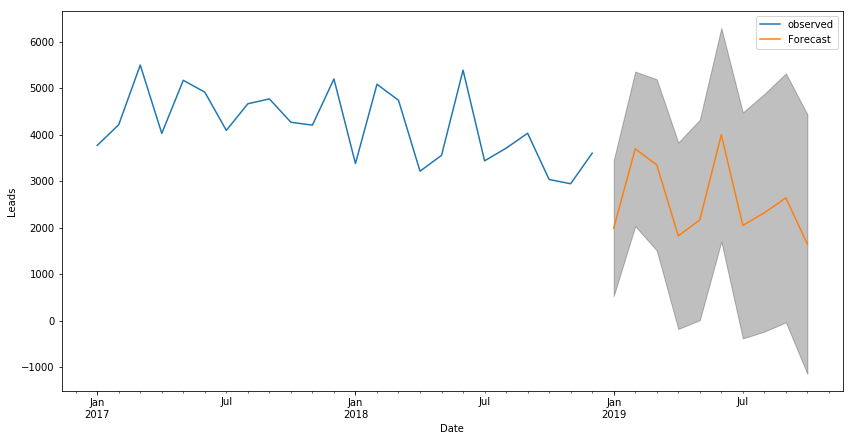

In [16]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Leads')
plt.legend()
plt.show()


In [19]:
pred = results.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)

#Obtain associated confidence intervals for forecasts of the time series
pred_ci = pred.conf_int()
pred_ci.head()

,lower Leads,upper Leads
2019-01-01,534.797033,3454.134094


In [28]:
forecast = results.forecast(steps=7)[1]

In [29]:
forecast

3698.015563428451